In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("./Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.count()

area_type       13320
availability    13320
location        13319
size            13304
society          7818
total_sqft      13320
bath            13247
balcony         12711
price           13320
dtype: int64

In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df2 =data.drop(["area_type","society","balcony","availability"],axis='columns')

In [7]:
df2


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()

In [10]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['BHK']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\vishn\AppData\Local\Temp\ipykernel_17980\329588128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [13]:
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
df3['BHK'].isnull().sum()

0

In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
def convert_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1])/2)
    try:
        return float(x)
    except:
        return None


In [19]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_to_num)
df4=df4[df4.total_sqft.notnull()]

In [20]:
df4.head()


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [22]:
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
df5_stats=df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.903582e+03
std      1.067277e+05
min      2.678298e+02
25%      4.237918e+03
50%      5.417545e+03
75%      7.307886e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [24]:
df5.to_csv("bhp.csv",index=False)

In [25]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [26]:
location_stats.values.sum()

13200

In [27]:
len(location_stats[location_stats>10])

240

In [28]:

len(location_stats)

1287

In [29]:
len(location_stats[location_stats<=10])

1047

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [31]:

len(df5.location.unique())

1287

In [32]:

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [33]:

df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [34]:
df5[df5.total_sqft/df5.BHK<=300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [36]:
df5.shape

(13200, 7)

In [37]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]

In [38]:
df6.shape

(12456, 7)

In [39]:
df6.head()
df6.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [40]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_pps_outliers(dfr):
    df_out=pd.DataFrame()
    for key, subdf in dfr.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)    
df7.shape

(10232, 7)

In [42]:
#df6.groupby('location')

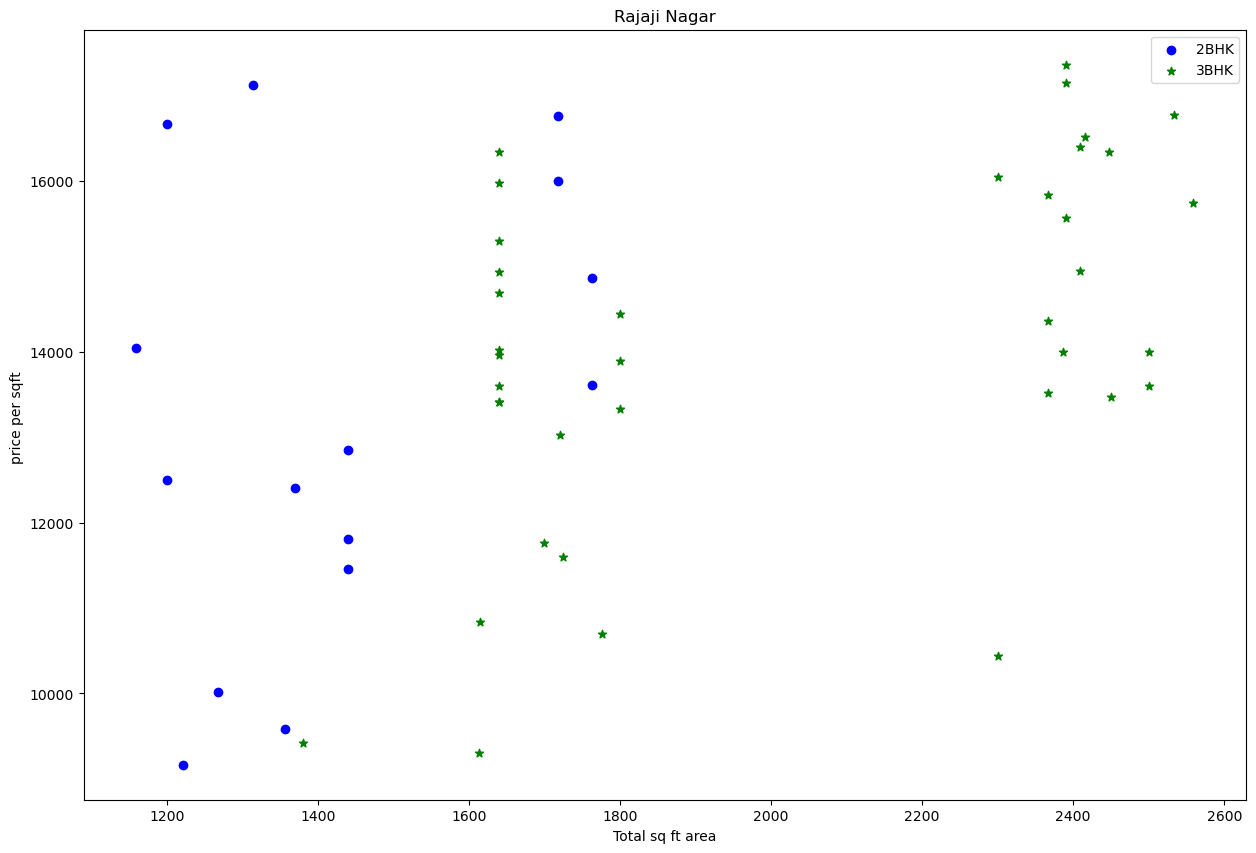

In [77]:
def scatter_plot(df,location):
    bhk2=df[(df.BHK==2) &(df.location==location)]
    bhk3=df[(df.BHK==3) &(df.location==location)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='*',color='green',label='3BHK')
    plt.title(location)
    plt.xlabel('Total sq ft area')
    plt.ylabel('price per sqft ')
    plt.legend()
    
    
scatter_plot(df7,"Rajaji Nagar")    

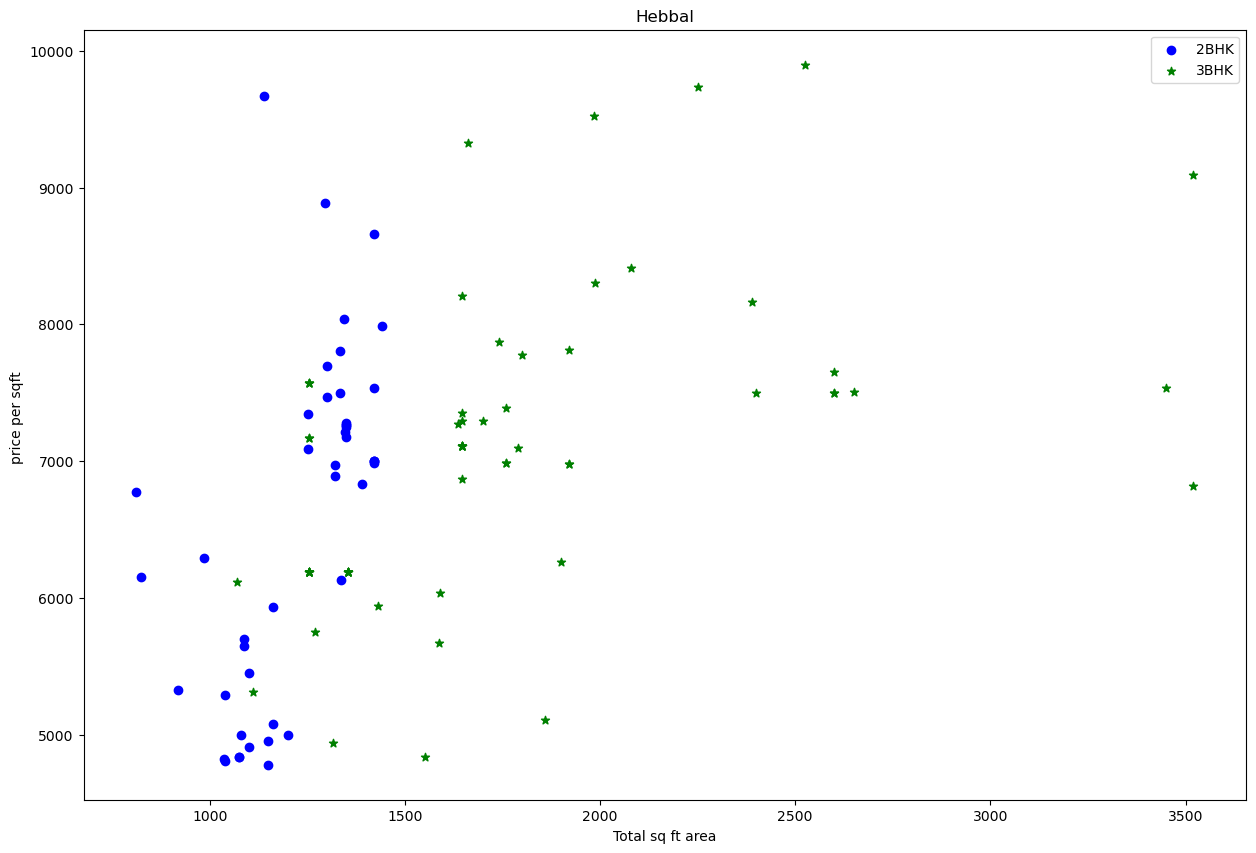

In [78]:
scatter_plot(df7,"Hebbal")  

In [47]:
def bhk_outliers(df):
    exclude_indices=np.array([])
    for loc,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')            
df8 = bhk_outliers(df7)
            

In [48]:
df8.shape


(7313, 7)

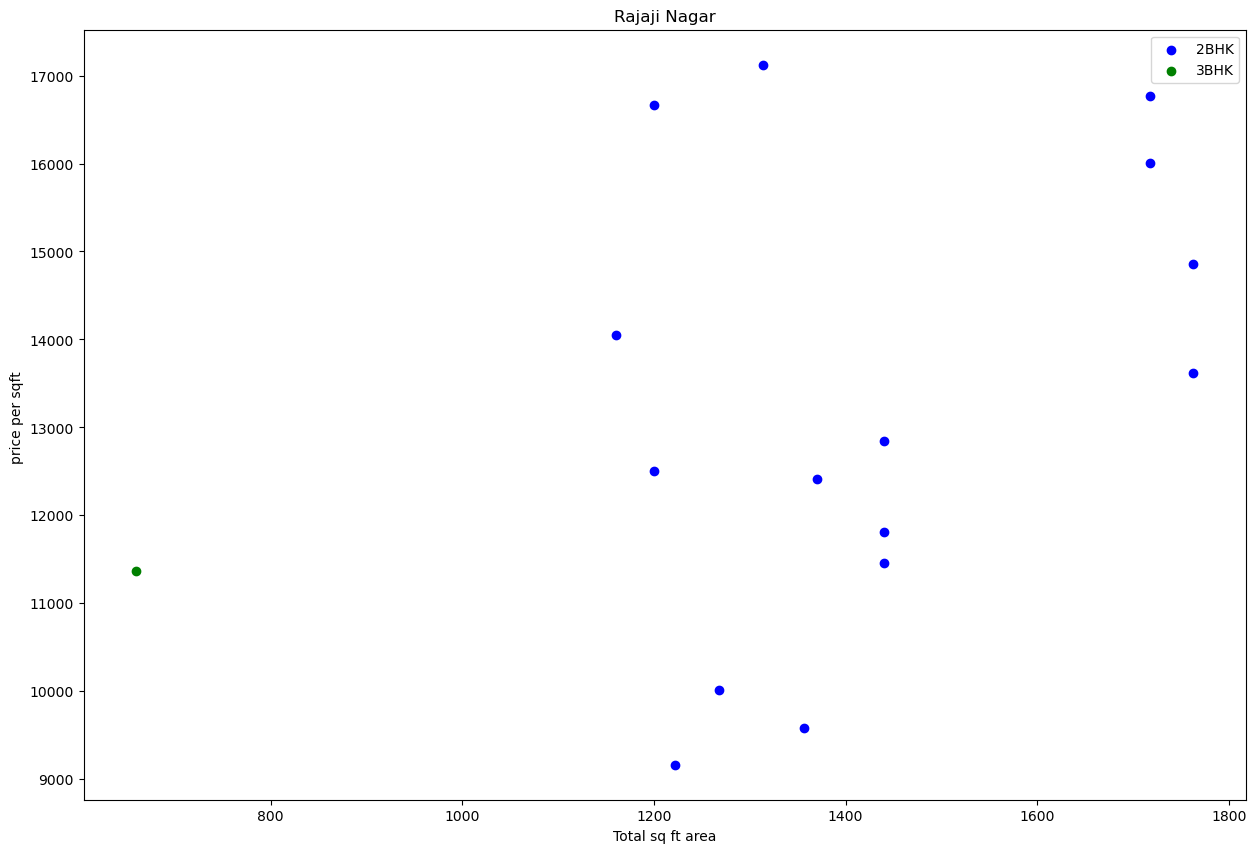

In [49]:

scatter_plot(df8,"Rajaji Nagar")

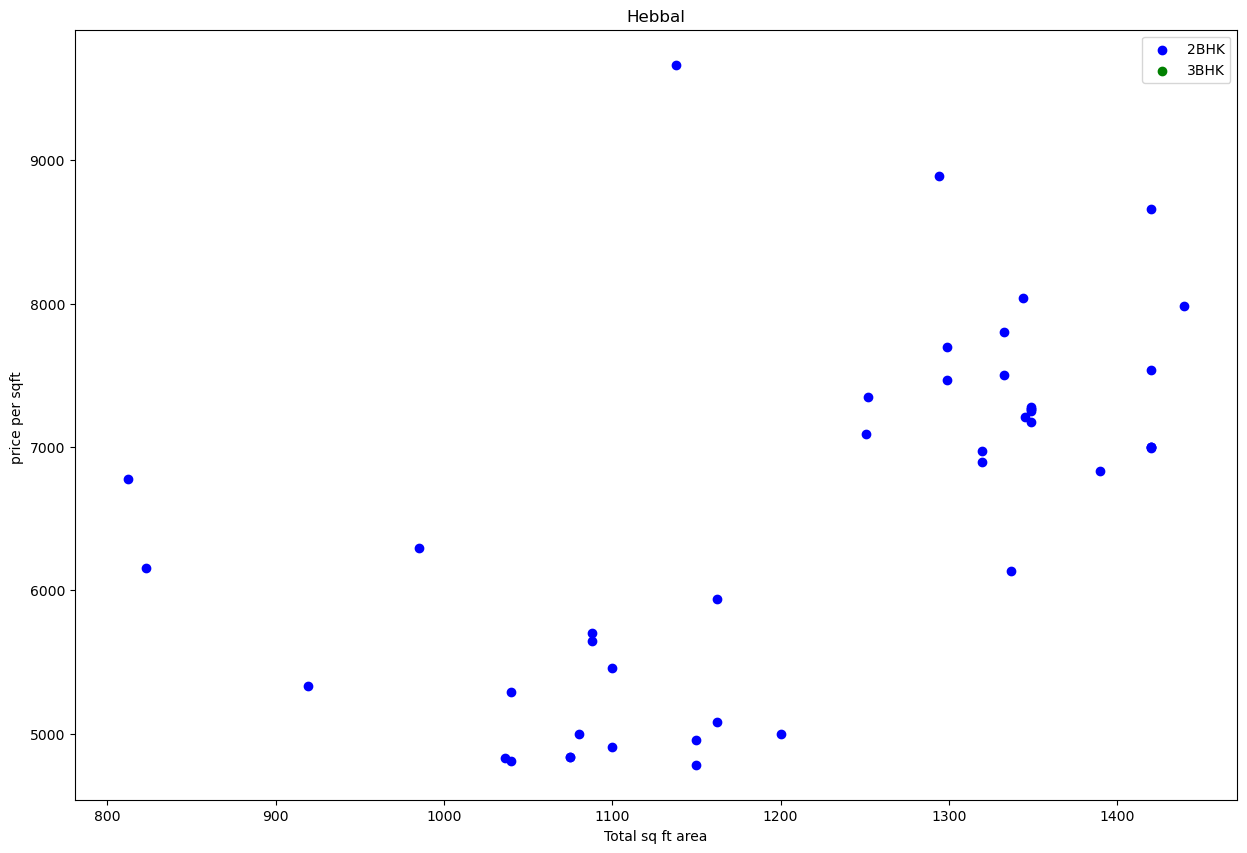

In [50]:
scatter_plot(df8,'Hebbal')

Text(0, 0.5, 'count')

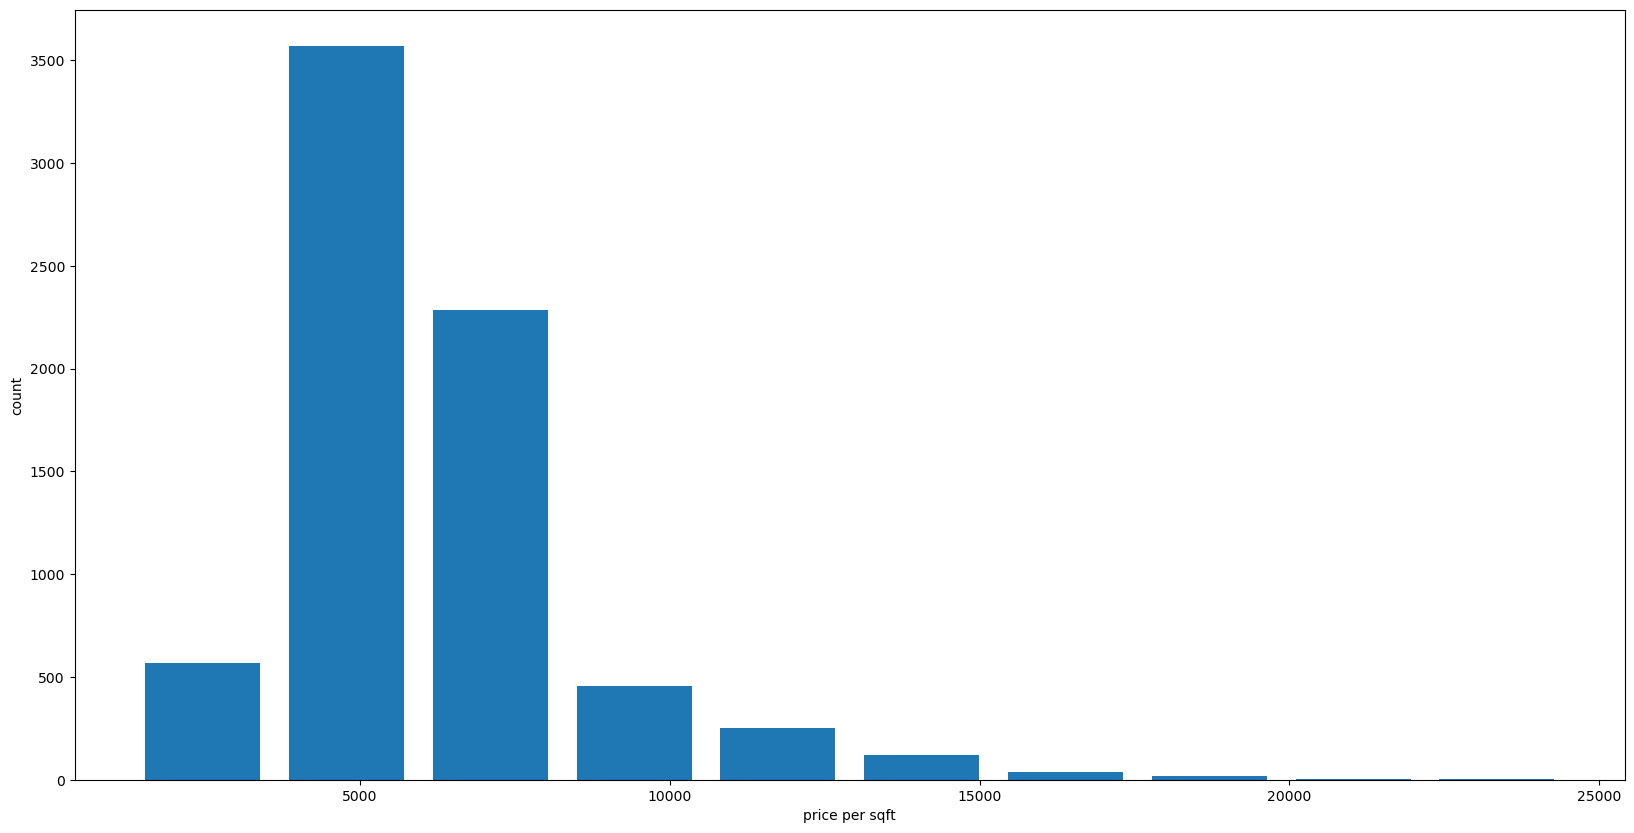

In [51]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('count')

In [52]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5273,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8473,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8562,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9296,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9627,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

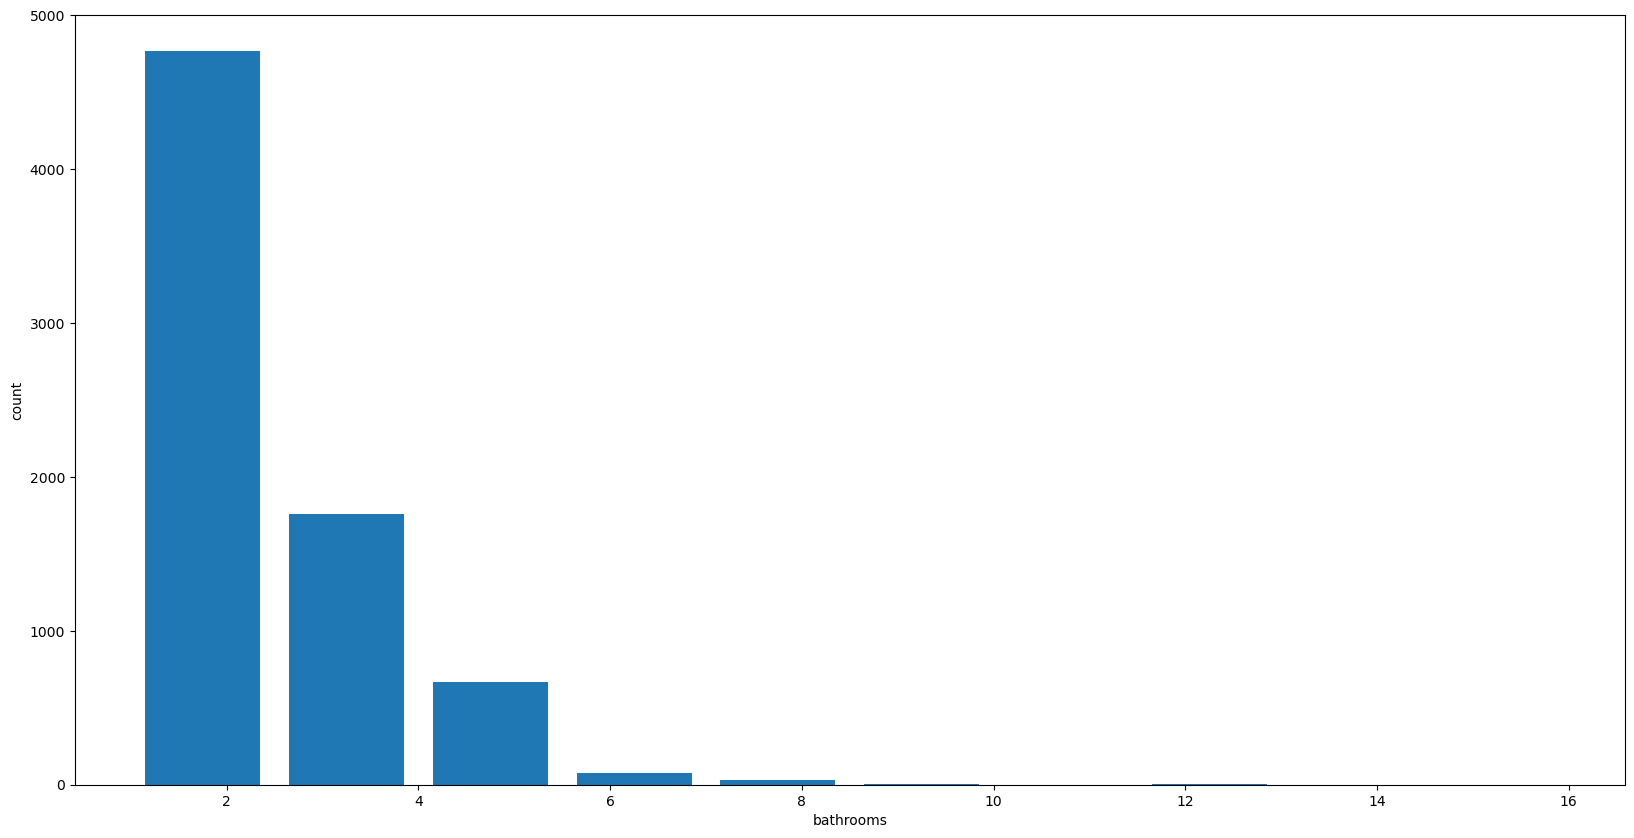

In [54]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('bathrooms')
plt.ylabel('count')

In [55]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1625,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5234,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6705,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8398,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [56]:
df9=df8[df8.bath<df8.BHK+2]
df9.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [57]:
df9.shape

(7239, 7)

In [58]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [59]:
loc_dummies=pd.get_dummies(df10.location)
loc_dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df11=pd.concat([df10,loc_dummies.drop(['other'],axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df12=df11.drop('location',axis='columns')

In [62]:
df12.shape

(7239, 244)

In [63]:
X=df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
Y=df12['price']
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [65]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.2,random_state=0)

In [66]:
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)
lr_model.score(X_test,Y_test)

0.8780756965822913

In [67]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
scores=cross_val_score(LinearRegression(),X,Y,cv=cv)

In [68]:
scores

array([0.8780757 , 0.87070119, 0.85422219, 0.82886803, 0.78380678])

In [69]:
np.mean(scores)

0.8431347769641805

In [70]:
def find_best_model(X,Y):
    models={
        'linear_regression' : {
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False],
                'copy_X':[True,False],
                'positive':[True,False]
                
                
            }
        },
        
        
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        
       'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['squared_error','friedman_mse','absolute_error'],
                'splitter':['best','random']
            }
       }
    }
    model_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

    for model,config in models.items():
        gs= GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        model_scores.append({
            'model':model,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(model_scores,columns=['model','best_score','best_params'])
    

In [71]:
find_best_model(X,Y)

,model,best_score,best_params
0,linear_regression,0.843349,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,lasso,0.710979,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.699184,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [72]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_model.predict([x])[0]    

In [73]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [74]:
predict_price('Uttarahalli',1440,3,2)

C:\Users\vishn\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.4278423060825

In [79]:
import pickle
with open('Bengaluru_price_predict.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [80]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))